# Análisis de Encuestas Stack Overflow Developer Survey (2023-2025)

Este notebook analiza los datos de las encuestas anuales de Stack Overflow sobre desarrolladores de software, enfocándose en lenguajes de programación y tendencias del sector.

Stack Overflow realiza su encuesta anual a desarrolladores principalmente en los meses de junio y julio, y publica los resultados poco después, generalmente en julio y agosto. Por ejemplo, la encuesta de 2025 se lanzó a finales de julio de 2025 y la de 2024 se publicó en el mismo período del año anterior.

## Índice
    1. Carga de Datos,
    2. Exploración Inicial,
    3. Análisis de Lenguajes de Programación,
    4. Comparación entre Años,
    5. Visualizaciones y Conclusiones


## 1. Configuración e Importación de Librerías

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Ignorar warnings\n",
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga de Datos de las Encuestas

In [51]:
# Definir rutas de archivos
data_paths = {
  '2023': 'data/developer-survey-2023/survey_results_public.csv',
  '2024': 'data/developer-survey-2024/survey_results_public.csv',
  '2025': 'data/developer-survey-2025/survey_results_public.csv',
}
# data_paths = {
#     '2025': './2025.csv',
#     '2024': './2024.csv',
#     '2023': './2023.csv',
# }
# Cargar los datos de cada año

# Elegir las columnas que vamos a manejar
columnas_a_manejar = [
  "Age", "Employment",
  "WorkExp", "DevType",
  "OrgSize", "Industry",
  "RemoteWork", "Country",
  "Currency", "CompTotal",
  'YearsCode',
  "DatabaseHaveWorkedWith",
  "PlatformHaveWorkedWith",
  "WebframeHaveWorkedWith",
  "OpSysProfessional use",
  # Lenguajes
  "LanguageHaveWorkedWith", "LanguageWantToWorkWith",
]
# LanguageHaveWorkedWith	LanguageWantToWorkWith LanguageAdmired (separados por ;)
df_sin_filtrar = {}
df = {}
df_original = {}

for year, path in data_paths.items():
  try:
    df_original[year] = pd.read_csv(path, low_memory=False)
    df[year] = df_original[year][columnas_a_manejar]

  except FileNotFoundError:
    print(f"⚠️ Archivo {year} no encontrado: {path}")

  except Exception as e:
    print(f"❌ Error al cargar {year}: {e})")
    print(f"📊 Total de años cargados: {len(df)}")

df_sin_filtrar = df.copy()

## 3. Exploración Inicial de Datos

In [112]:
# Funciones útiles
def separator(texto=""):
  print(f"\n{'=' * 45}\n{texto}\n{'=' * 45}")


def restaurar_datos():
  global df
  df = df_sin_filtrar.copy()


# Para acceder a los datos del data frame, ordenado en un diccionario,
# debemos referirnos al año correspondiente
def lectura_de_datos(data_frame_dict=df):
  for year, data_frame in data_frame_dict.items():
    print(f"\nDATA FRAME CORRESPONDIENTE AL AÑO {year}:")
    separator("Número de filas y columnas:")
    print(data_frame.shape)
    separator("Información:")
    data_frame.info()
    separator("Dataframe:")
    display(data_frame.head(5))
    separator("FIN DEL AÑO")

In [53]:

print("Data frame original: ")
lectura_de_datos(df_original)

separator()

print("Data frame a utilizar: ")
lectura_de_datos(df)


Data frame original: 

DATA FRAME CORRESPONDIENTE AL AÑO 2023:

Número de filas y columnas:
(89184, 84)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end


FIN DEL AÑO

DATA FRAME CORRESPONDIENTE AL AÑO 2024:

Número de filas y columnas:
(65437, 114)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Dataframe:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa


FIN DEL AÑO

DATA FRAME CORRESPONDIENTE AL AÑO 2025:

Número de filas y columnas:
(49123, 170)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Columns: 170 entries, ResponseId to JobSat
dtypes: float64(50), int64(1), object(119)
memory usage: 63.7+ MB

Dataframe:


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechEndorse_13_TEXT,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,TechOppose_15_TEXT,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,JobSatPoints_15_TEXT,AIThreat,NewRole,ToolCountWork,ToolCountPersonal,Country,Currency,CompTotal,LanguageChoice,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,LanguagesHaveEntry,LanguagesWantEntry,DatabaseChoice,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,DatabaseHaveEntry,DatabaseWantEntry,PlatformChoice,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,PlatformHaveEntry,PlatformWantEntry,WebframeChoice,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,WebframeHaveEntry,WebframeWantEntry,DevEnvsChoice,DevEnvsHaveWorkedWith,DevEnvsWantToWorkWith,DevEnvsAdmired,DevEnvHaveEntry,DevEnvWantEntry,SOTagsHaveWorkedWith,SOTagsWantToWorkWith,SOTagsAdmired,SOTagsHaveEntry,SOTagsWant Entry,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackHaveEntry,OfficeStackWantEntry,CommPlatformHaveWorkedWith,CommPlatformWantToWorkWith,CommPlatformAdmired,CommPlatformHaveEntr,CommPlatformWantEntr,AIModelsChoice,AIModelsHaveWorkedWith,AIModelsWantToWorkWith,AIModelsAdmired,AIModelsHaveEntry,AIModelsWantEntry,SOAccount,SOVisitFreq,SODuration,SOPartFreq,SO_Dev_Content,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,SO_Actions_15_TEXT,SOComm,SOFriction,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently partially AI,AIToolDon't plan to use AI for this task,AIToolPlan to partially use AI,AIToolPlan to mostly use AI,AIToolCurrently mostly AI,AIFrustration,AIExplain,AIAgents,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,1.0,8.0,14.0,NaN,15.0,7.0,8.0,12.0,11.0,1.0,6.0,13.0,3.0,16.0,NaN,Fintech,3.0,9.0,5.0,10.0,12.0,11.0,2.0,6.0,7.0,13.0,14.0,15.0,8.0,NaN,I'm not sure,I have neither consider or transitioned into a...,7.0,3.0,Ukraine,EUR European Euro,52800.0,Yes,Bash/Shell (all shells);Dart;SQL,Dart,Dart,NaN,NaN,Yes,Cloud Firestore;PostgreSQL,NaN,NaN,NaN,NaN,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Yes,Android Studio;Notepad++;Visual Studio;Visual ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Windows;MacOS;Android,Windows;MacOS;Android;iOS;iPadOS,Confluence;GitHub;GitLab;Jira;Markdown File,Markdown File,Markdown File,Na


FIN DEL AÑO


Data frame a utilizar: 

DATA FRAME CORRESPONDIENTE AL AÑO 2023:

Número de filas y columnas:
(89184, 17)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     89184 non-null  object 
 1   Employment              87898 non-null  object 
 2   WorkExp                 43579 non-null  float64
 3   DevType                 76872 non-null  object 
 4   OrgSize                 65043 non-null  object 
 5   Industry                36774 non-null  object 
 6   RemoteWork              73810 non-null  object 
 7   Country                 87973 non-null  object 
 8   Currency                65334 non-null  object 
 9   CompTotal               48225 non-null  float64
 10  YearsCode               87435 non-null  object 
 11  DatabaseHaveWorkedWith  73435 non-null  object 
 12  PlatformH

,Age,Employment,WorkExp,DevType,OrgSize,Industry,RemoteWork,Country,Currency,CompTotal,YearsCode,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",10.0,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,"Information Services, IT, Software Development...",Remote,United States of America,USD\tUnited States dollar,285000.0,18,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,MacOS;Windows;Windows Subsystem for Linux (WSL),HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...
2,45-54 years old,"Employed, full-time",23.0,"Developer, back-end","5,000 to 9,999 employees","Information Services, IT, Software Development...","Hybrid (some remote, some in-person)",United States of America,USD\tUnited States dollar,250000.0,27,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,MacOS;Other Linux-based,Bash/Shell (all shells);Go,Haskell;OCaml;Rust
3,25-34 years old,"Employed, full-time",7.0,"Developer, front-end",100 to 499 employees,NaN,"Hybrid (some remote, some in-person)",United States of America,USD\tUnited States dollar,156000.0,12,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,iOS;iPadOS;MacOS,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",6.0,"Developer, full-stack",20 to 99 employees,Other,Remote,Philippines,PHP\tPhilippine peso,1320000.0,6,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Other (Please Specify):,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript



FIN DEL AÑO

DATA FRAME CORRESPONDIENTE AL AÑO 2024:

Número de filas y columnas:
(65437, 17)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     65437 non-null  object 
 1   Employment              65437 non-null  object 
 2   WorkExp                 29658 non-null  float64
 3   DevType                 59445 non-null  object 
 4   OrgSize                 47480 non-null  object 
 5   Industry                28858 non-null  object 
 6   RemoteWork              54806 non-null  object 
 7   Country                 58930 non-null  object 
 8   Currency                46684 non-null  object 
 9   CompTotal               33740 non-null  float64
 10  YearsCode               59869 non-null  object 
 11  DatabaseHaveWorkedWith  50254 non-null  object 
 12  PlatformHaveWorkedWith  42366 non-n

,Age,Employment,WorkExp,DevType,OrgSize,Industry,RemoteWork,Country,Currency,CompTotal,YearsCode,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,Under 18 years old,"Employed, full-time",NaN,NaN,NaN,NaN,Remote,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35-44 years old,"Employed, full-time",17.0,"Developer, full-stack",NaN,NaN,Remote,United Kingdom of Great Britain and Northern I...,NaN,NaN,20,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,MacOS,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,45-54 years old,"Employed, full-time",NaN,Developer Experience,NaN,NaN,Remote,United Kingdom of Great Britain and Northern I...,NaN,NaN,37,Firebase Realtime Database,Google Cloud,ASP.NET CORE,Windows,C#,C#
3,18-24 years old,"Student, full-time",NaN,"Developer, full-stack",NaN,NaN,NaN,Canada,NaN,NaN,4,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4,18-24 years old,"Student, full-time",NaN,"Developer, full-stack",NaN,NaN,NaN,Norway,NaN,NaN,9,PostgreSQL;SQLite,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python



FIN DEL AÑO

DATA FRAME CORRESPONDIENTE AL AÑO 2025:

Número de filas y columnas:
(49123, 17)

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     49123 non-null  object 
 1   Employment              48277 non-null  object 
 2   WorkExp                 42844 non-null  float64
 3   DevType                 43636 non-null  object 
 4   OrgSize                 34144 non-null  object 
 5   Industry                33607 non-null  object 
 6   RemoteWork              33747 non-null  object 
 7   Country                 35402 non-null  object 
 8   Currency                35402 non-null  object 
 9   CompTotal               24839 non-null  float64
 10  YearsCode               43000 non-null  float64
 11  DatabaseHaveWorkedWith  25528 non-null  object 
 12  PlatformHaveWorkedWith  24234 non-n

,Age,Employment,WorkExp,DevType,OrgSize,Industry,RemoteWork,Country,Currency,CompTotal,YearsCode,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,OpSysProfessional use,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,25-34 years old,Employed,8.0,"Developer, mobile",20 to 99 employees,Fintech,Remote,Ukraine,EUR European Euro,52800.0,14.0,Cloud Firestore;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,NaN,Windows;MacOS;Android;iOS;iPadOS,Bash/Shell (all shells);Dart;SQL,Dart
1,25-34 years old,Employed,2.0,"Developer, back-end",500 to 999 employees,Retail and Consumer Services,"Hybrid (some in-person, leans heavy to flexibi...",Netherlands,EUR European Euro,90000.0,10.0,Dynamodb;MongoDB,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Spring Boot,MacOS,Java,Java;Python;Swift
2,35-44 years old,"Independent contractor, freelancer, or self-em...",10.0,"Developer, front-end",NaN,Software Development,NaN,Ukraine,UAH Ukrainian hryvnia,2214000.0,12.0,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,MacOS,Dart;HTML/CSS;JavaScript;TypeScript,Dart;HTML/CSS;JavaScript;TypeScript
3,35-44 years old,Employed,4.0,"Developer, back-end","10,000 or more employees",Retail and Consumer Services,Remote,Ukraine,EUR European Euro,31200.0,5.0,NaN,Amazon Web Services (AWS);Google Cloud,Spring Boot,Windows;Ubuntu,Java;Kotlin;SQL,Java;Kotlin
4,35-44 years old,"Independent contractor, freelancer, or self-em...",21.0,Engineering manager,NaN,Software Development,NaN,Ukraine,USD United States dollar,60000.0,22.0,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,Windows;Ubuntu;Debian,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,C#;Java;JavaScript;Python;SQL;TypeScript



FIN DEL AÑO


## Limpieza y preparación de datos

In [54]:
#Cuenta cuántos datos vacíos hay
def contador_de_nulos(data_frame_dict):
  for year, data_frame in data_frame_dict.items():
    separator(f"Año: {year}")
    print(data_frame.isnull().sum())
    print(f"\nTotal de nulos: {data_frame.isnull().sum().sum()}")


separator("Data frame original")
contador_de_nulos(df_original)
separator()
separator("Data frame a utilizar")
contador_de_nulos(df)


Data frame original

Año: 2023
ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                              1286
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
LearnCode                               1521
LearnCodeOnline                        19100
LearnCodeCoursesCert                   52108
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
PurchaseInfluence                      24220
TechList                               28333
BuyNewTool                              6175
Country                                 1211
Currency                               23850
CompTotal                              40959
LanguageHaveWorkedWith 

In [197]:
# Constantes
# Eliminaremos a los menores de edad para disminuir la cantidad de nulos en los data frames
edad_que_no_vamos_a_considerar = [
  "Under 18 years old", "55-64 years old", "65 years or older", "Prefer not to say"
]

# Reemplazaremos los valores de nulos por "No especificado"
columnas_a_rellenar = ["DevType", "OrgSize", "RemoteWork", "Industry", "Country", "Employment"]

# Dejaremos los datos que tengan monedas en los valores a considerar
monedas_a_considerar = "USD|EUR"

# Dejaremos únicamente los datos de los desarrolladores
tipo_de_desarrollador = "Developer"

# Variables a analizar

variables_numericas = ['WorkExp', 'YearsCode', 'CompTotal']
variables_a_rellenar = ['OrgSize', 'RemoteWork', 'Industry', 'Country']

variables_anidadas = ['DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
                      'OpSysProfessional use', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith']

# Obtener las monedas y años
monedas = monedas_a_considerar.split("|")
anios = list(df.keys())


### Filtros y remplazo de nulos personalizados

In [201]:
restaurar_datos()

In [202]:
for year, data_frame in df.items():
  # Eliminaremos a las edades que no vamos a considerar
  data_frame = data_frame[~data_frame["Age"].isin(edad_que_no_vamos_a_considerar)]

  # Eliminaremos a los que no sean desarrolladores
  data_frame = data_frame[data_frame["DevType"].str.contains(tipo_de_desarrollador, na=False)]

  # Dejaremos solo a los que cobran con las monedas a considerar
  data_frame = data_frame[data_frame["Currency"].str.contains(monedas_a_considerar, na=False)]

  # Eliminaremos todos los desarrolladores que tengan
  #   - Menos de 1 año programando
  #   - Más de 50 años programando
  if year == "2025":
    data_frame.loc[data_frame["YearsCode"] < 1, "YearsCode"] = np.nan
    data_frame.loc[data_frame["YearsCode"] > 50, "YearsCode"] = np.nan
  else:
    # Si hay strings no numéricos, los convertiremos a float, poniendo NaN donde falle
    data_frame["YearsCode"] = pd.to_numeric(data_frame["YearsCode"], errors='coerce')
  # Ahora elimina los NaN que quedaron tras conversión
  data_frame.dropna(subset=["YearsCode"], inplace=True)

  # Dejaremos únicamente a los tengan experiencia de trabajo
  data_frame.dropna(subset=["WorkExp"], inplace=True)
  data_frame.dropna(subset=["CompTotal"], inplace=True)
  data_frame.dropna(subset=["LanguageHaveWorkedWith"], inplace=True)

  # Remplazaremos los nulos en categorías de strings por "No especificado"
  for columna in variables_a_rellenar:
    data_frame[columna] = data_frame[columna].fillna("No especificado")

  for columna in variables_anidadas:
    data_frame[columna] = data_frame[columna].fillna("Ninguno")
  # Asignamos el data frame limpio al diccionario
  df[year] = data_frame

contador_de_nulos(df)


Año: 2023
Age                       0
Employment                0
WorkExp                   0
DevType                   0
OrgSize                   0
Industry                  0
RemoteWork                0
Country                   0
Currency                  0
CompTotal                 0
YearsCode                 0
DatabaseHaveWorkedWith    0
PlatformHaveWorkedWith    0
WebframeHaveWorkedWith    0
OpSysProfessional use     0
LanguageHaveWorkedWith    0
LanguageWantToWorkWith    0
dtype: int64

Total de nulos: 0

Año: 2024
Age                       0
Employment                0
WorkExp                   0
DevType                   0
OrgSize                   0
Industry                  0
RemoteWork                0
Country                   0
Currency                  0
CompTotal                 0
YearsCode                 0
DatabaseHaveWorkedWith    0
PlatformHaveWorkedWith    0
WebframeHaveWorkedWith    0
OpSysProfessional use     0
LanguageHaveWorkedWith    0
LanguageWantToWorkWith

### Conversión de monedas

In [203]:
# Convertir los euros a dólares
# Tasas de cambio históricas EUR a USD (aproximadas)
tasas_cambio = { # valores del euro a dólar cuando se realizó la encuesta (junio-julio)
    '2023': 1.0999,
    '2024': 1.0830		,
    '2025': 1.1700
}

# Ver cantidad de monedas
for year in anios:
  print(f"\nMonedas en {year}:")
  print(df[year].Currency.value_counts())

# Convertir EUR a USD
for year, data_frame in df.items():
    # Crear máscara para identificar registros en EUR
    mask_eur = data_frame['Currency'] == 'EUR European Euro'

    # Convertir CompTotal de EUR a USD
    data_frame.loc[mask_eur, 'CompTotal'] = data_frame.loc[mask_eur, 'CompTotal'] * tasas_cambio[year]

    # Cambiar la moneda a USD para estos registros
    data_frame.loc[mask_eur, 'Currency'] = 'USD\tConvertido'

    print(f"Año {year}: {mask_eur.sum()} registros convertidos de EUR a USD")


Monedas en 2023:
Currency
EUR European Euro            6568
USD\tUnited States dollar    6504
Name: count, dtype: int64

Monedas en 2024:
Currency
EUR European Euro            4750
USD\tUnited States dollar    4039
Name: count, dtype: int64

Monedas en 2025:
Currency
EUR European Euro           4145
USD United States dollar    3582
Name: count, dtype: int64
Año 2023: 6568 registros convertidos de EUR a USD
Año 2024: 4750 registros convertidos de EUR a USD
Año 2025: 4145 registros convertidos de EUR a USD


### Valores atípicos en variables numéricas

In [204]:
# ========================================
# FUNCIONES REUTILIZABLES PARA ANÁLISIS DE OUTLIERS
# ========================================

def calcular_estadisticas_descriptivas(data_frame_dict, variables_num):
    """
    Calcula estadísticas descriptivas para variables numéricas de todos los años.

    Parameters:
    -----------
    data_frame_dict : dict
        Diccionario con DataFrames por año
    variables_num : list
        Lista de nombres de variables numéricas

    Returns:
    --------
    dict : Diccionario con estadísticas por año
    """
    estadisticas = {}

    for year, df_year in data_frame_dict.items():
        estadisticas[year] = {}

        for var in variables_num:
            stats = {
                'count': df_year[var].count(),
                'mean': df_year[var].mean(),
                'median': df_year[var].median(),
                'std': df_year[var].std(),
                'min': df_year[var].min(),
                'max': df_year[var].max(),
                'q1': df_year[var].quantile(0.25),
                'q3': df_year[var].quantile(0.75),
                'iqr': df_year[var].quantile(0.75) - df_year[var].quantile(0.25)
            }
            estadisticas[year][var] = stats

    return estadisticas


def detectar_outliers_iqr(serie, multiplicador=1.5):
    """
    Detecta outliers usando el método del Rango Intercuartílico (IQR).

    Parameters:
    -----------
    serie : pd.Series
        Serie de datos numéricos
    multiplicador : float
        Multiplicador del IQR (1.5 = moderado, 3 = extremo)

    Returns:
    --------
    tuple : (mask_outliers, limite_inferior, limite_superior, estadísticas)
    """
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - multiplicador * IQR
    limite_superior = Q3 + multiplicador * IQR

    mask_outliers = (serie < limite_inferior) | (serie > limite_superior)

    estadisticas = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'n_outliers': mask_outliers.sum(),
        'porcentaje_outliers': (mask_outliers.sum() / len(serie)) * 100
    }

    return mask_outliers, limite_inferior, limite_superior, estadisticas


def detectar_outliers_zscore(serie, umbral=3):
    """
    Detecta outliers usando el método Z-Score.

    Parameters:
    -----------
    serie : pd.Series
        Serie de datos numéricos
    umbral : float
        Umbral de desviaciones estándar (típicamente 3)

    Returns:
    --------
    tuple : (mask_outliers, z_scores, estadísticas)
    """
    media = serie.mean()
    std = serie.std()
    z_scores = np.abs((serie - media) / std)

    mask_outliers = z_scores > umbral

    estadisticas = {
        'media': media,
        'std': std,
        'umbral': umbral,
        'n_outliers': mask_outliers.sum(),
        'porcentaje_outliers': (mask_outliers.sum() / len(serie)) * 100
    }

    return mask_outliers, z_scores, estadisticas


def analizar_outliers_por_variable(data_frame_dict, variable, multiplicador_iqr=1.5, umbral_z=3):
    """
    Analiza outliers de una variable específica usando múltiples métodos.

    Parameters:
    -----------
    data_frame_dict : dict
        Diccionario con DataFrames por año
    variable : str
        Nombre de la variable a analizar
    multiplicador_iqr : float
        Multiplicador para el método IQR
    umbral_z : float
        Umbral para el método Z-Score

    Returns:
    --------
    dict : Resultados del análisis por año y método
    """
    resultados = {}

    for year, df_year in data_frame_dict.items():
        # Método IQR
        mask_iqr, lim_inf_iqr, lim_sup_iqr, stats_iqr = detectar_outliers_iqr(
            df_year[variable], multiplicador_iqr
        )

        # Método Z-Score
        mask_zscore, z_scores, stats_zscore = detectar_outliers_zscore(
            df_year[variable], umbral_z
        )

        # Outliers detectados por ambos métodos (más confiables)
        mask_ambos = mask_iqr & mask_zscore

        resultados[year] = {
            'iqr': {
                'mask': mask_iqr,
                'limite_inferior': lim_inf_iqr,
                'limite_superior': lim_sup_iqr,
                'estadisticas': stats_iqr
            },
            'zscore': {
                'mask': mask_zscore,
                'z_scores': z_scores,
                'estadisticas': stats_zscore
            },
            'ambos_metodos': {
                'mask': mask_ambos,
                'n_outliers': mask_ambos.sum(),
                'porcentaje': (mask_ambos.sum() / len(df_year)) * 100
            }
        }

    return resultados


def crear_reporte_outliers(resultados_analisis, variable):
    """
    Crea un reporte legible de los outliers detectados.

    Parameters:
    -----------
    resultados_analisis : dict
        Resultados del análisis de outliers
    variable : str
        Nombre de la variable analizada
    """
    separator(f"REPORTE DE OUTLIERS: {variable}")

    for year, resultados in resultados_analisis.items():
        print(f"\n{'─' * 60}")
        print(f"AÑO {year}")
        print(f"{'─' * 60}")

        # Método IQR
        stats_iqr = resultados['iqr']['estadisticas']
        print(f"\n📊 Método IQR (Rango Intercuartílico):")
        print(f"   Q1: {stats_iqr['Q1']:,.2f}")
        print(f"   Q3: {stats_iqr['Q3']:,.2f}")
        print(f"   IQR: {stats_iqr['IQR']:,.2f}")
        print(f"   Límite inferior: {stats_iqr['limite_inferior']:,.2f}")
        print(f"   Límite superior: {stats_iqr['limite_superior']:,.2f}")
        print(f"   ⚠️  Outliers detectados: {stats_iqr['n_outliers']} ({stats_iqr['porcentaje_outliers']:.2f}%)")

        # Método Z-Score
        stats_z = resultados['zscore']['estadisticas']
        print(f"\n📈 Método Z-Score:")
        print(f"   Media: {stats_z['media']:,.2f}")
        print(f"   Desviación estándar: {stats_z['std']:,.2f}")
        print(f"   Umbral: ±{stats_z['umbral']} desviaciones")
        print(f"   ⚠️  Outliers detectados: {stats_z['n_outliers']} ({stats_z['porcentaje_outliers']:.2f}%)")

        # Ambos métodos
        ambos = resultados['ambos_metodos']
        print(f"\n🎯 Outliers detectados por AMBOS métodos:")
        print(f"   Total: {ambos['n_outliers']} ({ambos['porcentaje']:.2f}%)")
        print(f"   (Estos son los más confiables para eliminar)")


def visualizar_outliers(data_frame_dict, variable, resultados_analisis):
    """
    Crea visualizaciones para analizar outliers.

    Parameters:
    -----------
    data_frame_dict : dict
        Diccionario con DataFrames por año
    variable : str
        Nombre de la variable a visualizar
    resultados_analisis : dict
        Resultados del análisis de outliers
    """
    n_years = len(data_frame_dict)
    fig, axes = plt.subplots(n_years, 3, figsize=(18, 5*n_years))

    if n_years == 1:
        axes = axes.reshape(1, -1)

    for idx, (year, df_year) in enumerate(data_frame_dict.items()):
        # Boxplot
        ax1 = axes[idx, 0]
        df_year.boxplot(column=variable, ax=ax1)
        ax1.set_title(f'Boxplot - {variable} ({year})', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Valor')
        ax1.grid(True, alpha=0.3)

        # Histograma con líneas de límites
        ax2 = axes[idx, 1]
        ax2.hist(df_year[variable], bins=50, edgecolor='black', alpha=0.7)

        # Añadir líneas de límites IQR
        lim_inf = resultados_analisis[year]['iqr']['limite_inferior']
        lim_sup = resultados_analisis[year]['iqr']['limite_superior']
        ax2.axvline(lim_inf, color='red', linestyle='--', linewidth=2, label=f'Límite inferior IQR: {lim_inf:,.0f}')
        ax2.axvline(lim_sup, color='red', linestyle='--', linewidth=2, label=f'Límite superior IQR: {lim_sup:,.0f}')

        ax2.set_title(f'Distribución - {variable} ({year})', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Valor')
        ax2.set_ylabel('Frecuencia')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Violin plot
        ax3 = axes[idx, 2]
        parts = ax3.violinplot([df_year[variable].dropna()], positions=[0],
                               showmeans=True, showmedians=True)
        ax3.set_title(f'Violin Plot - {variable} ({year})', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Valor')
        ax3.set_xticks([0])
        ax3.set_xticklabels([year])
        ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def comparar_con_sin_outliers(data_frame_dict, variable, resultados_analisis, metodo='iqr'):
    """
    Compara estadísticas descriptivas con y sin outliers.

    Parameters:
    -----------
    data_frame_dict : dict
        Diccionario con DataFrames por año
    variable : str
        Nombre de la variable a comparar
    resultados_analisis : dict
        Resultados del análisis de outliers
    metodo : str
        Método a usar ('iqr', 'zscore', 'ambos_metodos')
    """
    separator(f"COMPARACIÓN CON/SIN OUTLIERS: {variable} (Método: {metodo.upper()})")

    comparaciones = []

    for year, df_year in data_frame_dict.items():
        # Datos originales
        datos_originales = df_year[variable]

        # Datos sin outliers
        mask_outliers = resultados_analisis[year][metodo]['mask']
        datos_sin_outliers = df_year[~mask_outliers][variable]

        comparacion = {
            'Año': year,
            'Métrica': ['Count', 'Media', 'Mediana', 'Std', 'Min', 'Max', '% Cambio Media'],
            'Con Outliers': [
                datos_originales.count(),
                datos_originales.mean(),
                datos_originales.median(),
                datos_originales.std(),
                datos_originales.min(),
                datos_originales.max(),
                0
            ],
            'Sin Outliers': [
                datos_sin_outliers.count(),
                datos_sin_outliers.mean(),
                datos_sin_outliers.median(),
                datos_sin_outliers.std(),
                datos_sin_outliers.min(),
                datos_sin_outliers.max(),
                ((datos_sin_outliers.mean() - datos_originales.mean()) / datos_originales.mean()) * 100
            ]
        }

        comparaciones.append(comparacion)

        # Mostrar tabla
        print(f"\n{'═' * 80}")
        print(f"AÑO {year}")
        print(f"{'═' * 80}")
        df_comp = pd.DataFrame({
            'Métrica': comparacion['Métrica'],
            'Con Outliers': comparacion['Con Outliers'],
            'Sin Outliers': comparacion['Sin Outliers']
        })
        print(df_comp.to_string(index=False))
        print(f"\n📉 Registros eliminados: {mask_outliers.sum()} ({(mask_outliers.sum()/len(df_year))*100:.2f}%)")

    return comparaciones


def investigar_outliers(data_frame_dict, variable, resultados_analisis, metodo='ambos_metodos', top_n=10):
    """
    Investiga las características de los outliers para entender sus causas.

    Parameters:
    -----------
    data_frame_dict : dict
        Diccionario con DataFrames por año
    variable : str
        Variable con outliers
    resultados_analisis : dict
        Resultados del análisis
    metodo : str
        Método usado para detectar outliers
    top_n : int
        Número de outliers extremos a analizar
    """
    separator(f"INVESTIGACIÓN DE OUTLIERS: {variable}")

    for year, df_year in data_frame_dict.items():
        print(f"\n{'═' * 80}")
        print(f"AÑO {year}")
        print(f"{'═' * 80}")

        mask_outliers = resultados_analisis[year][metodo]['mask']
        df_outliers = df_year[mask_outliers].copy()

        if len(df_outliers) == 0:
            print(f"✅ No se detectaron outliers con el método '{metodo}'")
            continue

        print(f"\n📊 Total de outliers: {len(df_outliers)}")

        # Analizar outliers extremos (top_n más altos)
        df_outliers_sorted = df_outliers.nlargest(top_n, variable)

        print(f"\n🔍 Top {top_n} outliers más extremos:")
        print(f"\n{variable} - Valores extremos:")
        print(df_outliers_sorted[variable].to_string())

        # Análisis por características
        print(f"\n📈 Características de los outliers:")

        # Por tamaño de organización
        if 'OrgSize' in df_outliers.columns:
            print(f"\n  • Distribución por tamaño de organización:")
            org_dist = df_outliers['OrgSize'].value_counts()
            for org, count in org_dist.head(5).items():
                pct = (count / len(df_outliers)) * 100
                print(f"    - {org}: {count} ({pct:.1f}%)")

        # Por país
        if 'Country' in df_outliers.columns:
            print(f"\n  • Top 5 países con outliers:")
            country_dist = df_outliers['Country'].value_counts()
            for country, count in country_dist.head(5).items():
                pct = (count / len(df_outliers)) * 100
                print(f"    - {country}: {count} ({pct:.1f}%)")

        # Por industria
        if 'Industry' in df_outliers.columns:
            print(f"\n  • Top 5 industrias con outliers:")
            industry_dist = df_outliers['Industry'].value_counts()
            for industry, count in industry_dist.head(5).items():
                pct = (count / len(df_outliers)) * 100
                print(f"    - {industry}: {count} ({pct:.1f}%)")

        # Por experiencia (si la variable no es experiencia)
        if variable != 'WorkExp' and 'WorkExp' in df_outliers.columns:
            print(f"\n  • Experiencia laboral promedio de outliers: {df_outliers['WorkExp'].mean():.1f} años")
            print(f"    (vs población general: {df_year['WorkExp'].mean():.1f} años)")

        if variable != 'YearsCode' and 'YearsCode' in df_outliers.columns:
            print(f"\n  • Años programando promedio de outliers: {df_outliers['YearsCode'].mean():.1f} años")
            print(f"    (vs población general: {df_year['YearsCode'].mean():.1f} años)")

        # Análisis de correlación (si es CompTotal)
        if variable == 'CompTotal':
            print(f"\n  💡 Análisis de factores que explican salarios altos:")
            print(f"    - WorkExp medio: {df_outliers['WorkExp'].mean():.1f} años (general: {df_year['WorkExp'].mean():.1f})")
            print(f"    - YearsCode medio: {df_outliers['YearsCode'].mean():.1f} años (general: {df_year['YearsCode'].mean():.1f})")

print("✅ Funciones de análisis de outliers creadas correctamente")

✅ Funciones de análisis de outliers creadas correctamente


#### 4.1 Estadísticas descriptivas iniciales

In [205]:
# Calcular estadísticas descriptivas para todas las variables numéricas
estadisticas_iniciales = calcular_estadisticas_descriptivas(df, variables_numericas)

# Mostrar estadísticas
separator("ESTADÍSTICAS DESCRIPTIVAS - DATOS ORIGINALES")

for year in anios:
    print(f"\n{'═' * 80}")
    print(f"AÑO {year}")
    print(f"{'═' * 80}")

    for var in variables_numericas:
        stats = estadisticas_iniciales[year][var]
        print(f"\n📊 {var}:")
        print(f"   Count:   {stats['count']:>10,}")
        print(f"   Media:   {stats['mean']:>10,.2f}")
        print(f"   Mediana: {stats['median']:>10,.2f}")
        print(f"   Std Dev: {stats['std']:>10,.2f}")
        print(f"   Mínimo:  {stats['min']:>10,.2f}")
        print(f"   Máximo:  {stats['max']:>10,.2f}")
        print(f"   Q1:      {stats['q1']:>10,.2f}")
        print(f"   Q3:      {stats['q3']:>10,.2f}")
        print(f"   IQR:     {stats['iqr']:>10,.2f}")


ESTADÍSTICAS DESCRIPTIVAS - DATOS ORIGINALES

════════════════════════════════════════════════════════════════════════════════
AÑO 2023
════════════════════════════════════════════════════════════════════════════════

📊 WorkExp:
   Count:       13,072
   Media:        10.92
   Mediana:       9.00
   Std Dev:       7.55
   Mínimo:        0.00
   Máximo:       47.00
   Q1:            5.00
   Q3:           15.00
   IQR:          10.00

📊 YearsCode:
   Count:       13,072
   Media:        14.93
   Mediana:      13.00
   Std Dev:       8.35
   Mínimo:        1.00
   Máximo:       48.00
   Q1:            9.00
   Q3:           20.00
   IQR:          11.00

📊 CompTotal:
   Count:       13,072
   Media:   108,630.33
   Mediana:  87,992.00
   Std Dev: 116,354.77
   Mínimo:        0.00
   Máximo:  9,316,153.00
   Q1:       55,000.00
   Q3:      140,000.00
   IQR:      85,000.00

════════════════════════════════════════════════════════════════════════════════
AÑO 2024
════════════════════════════

#### 4.2 Detección de outliers - WorkExp (Años de experiencia laboral)


REPORTE DE OUTLIERS: WorkExp

────────────────────────────────────────────────────────────
AÑO 2023
────────────────────────────────────────────────────────────

📊 Método IQR (Rango Intercuartílico):
   Q1: 5.00
   Q3: 15.00
   IQR: 10.00
   Límite inferior: -10.00
   Límite superior: 30.00
   ⚠️  Outliers detectados: 192 (1.47%)

📈 Método Z-Score:
   Media: 10.92
   Desviación estándar: 7.55
   Umbral: ±3 desviaciones
   ⚠️  Outliers detectados: 96 (0.73%)

🎯 Outliers detectados por AMBOS métodos:
   Total: 96 (0.73%)
   (Estos son los más confiables para eliminar)

────────────────────────────────────────────────────────────
AÑO 2024
────────────────────────────────────────────────────────────

📊 Método IQR (Rango Intercuartílico):
   Q1: 5.00
   Q3: 15.00
   IQR: 10.00
   Límite inferior: -10.00
   Límite superior: 30.00
   ⚠️  Outliers detectados: 109 (1.24%)

📈 Método Z-Score:
   Media: 10.78
   Desviación estándar: 7.53
   Umbral: ±3 desviaciones
   ⚠️  Outliers detectados: 55 (

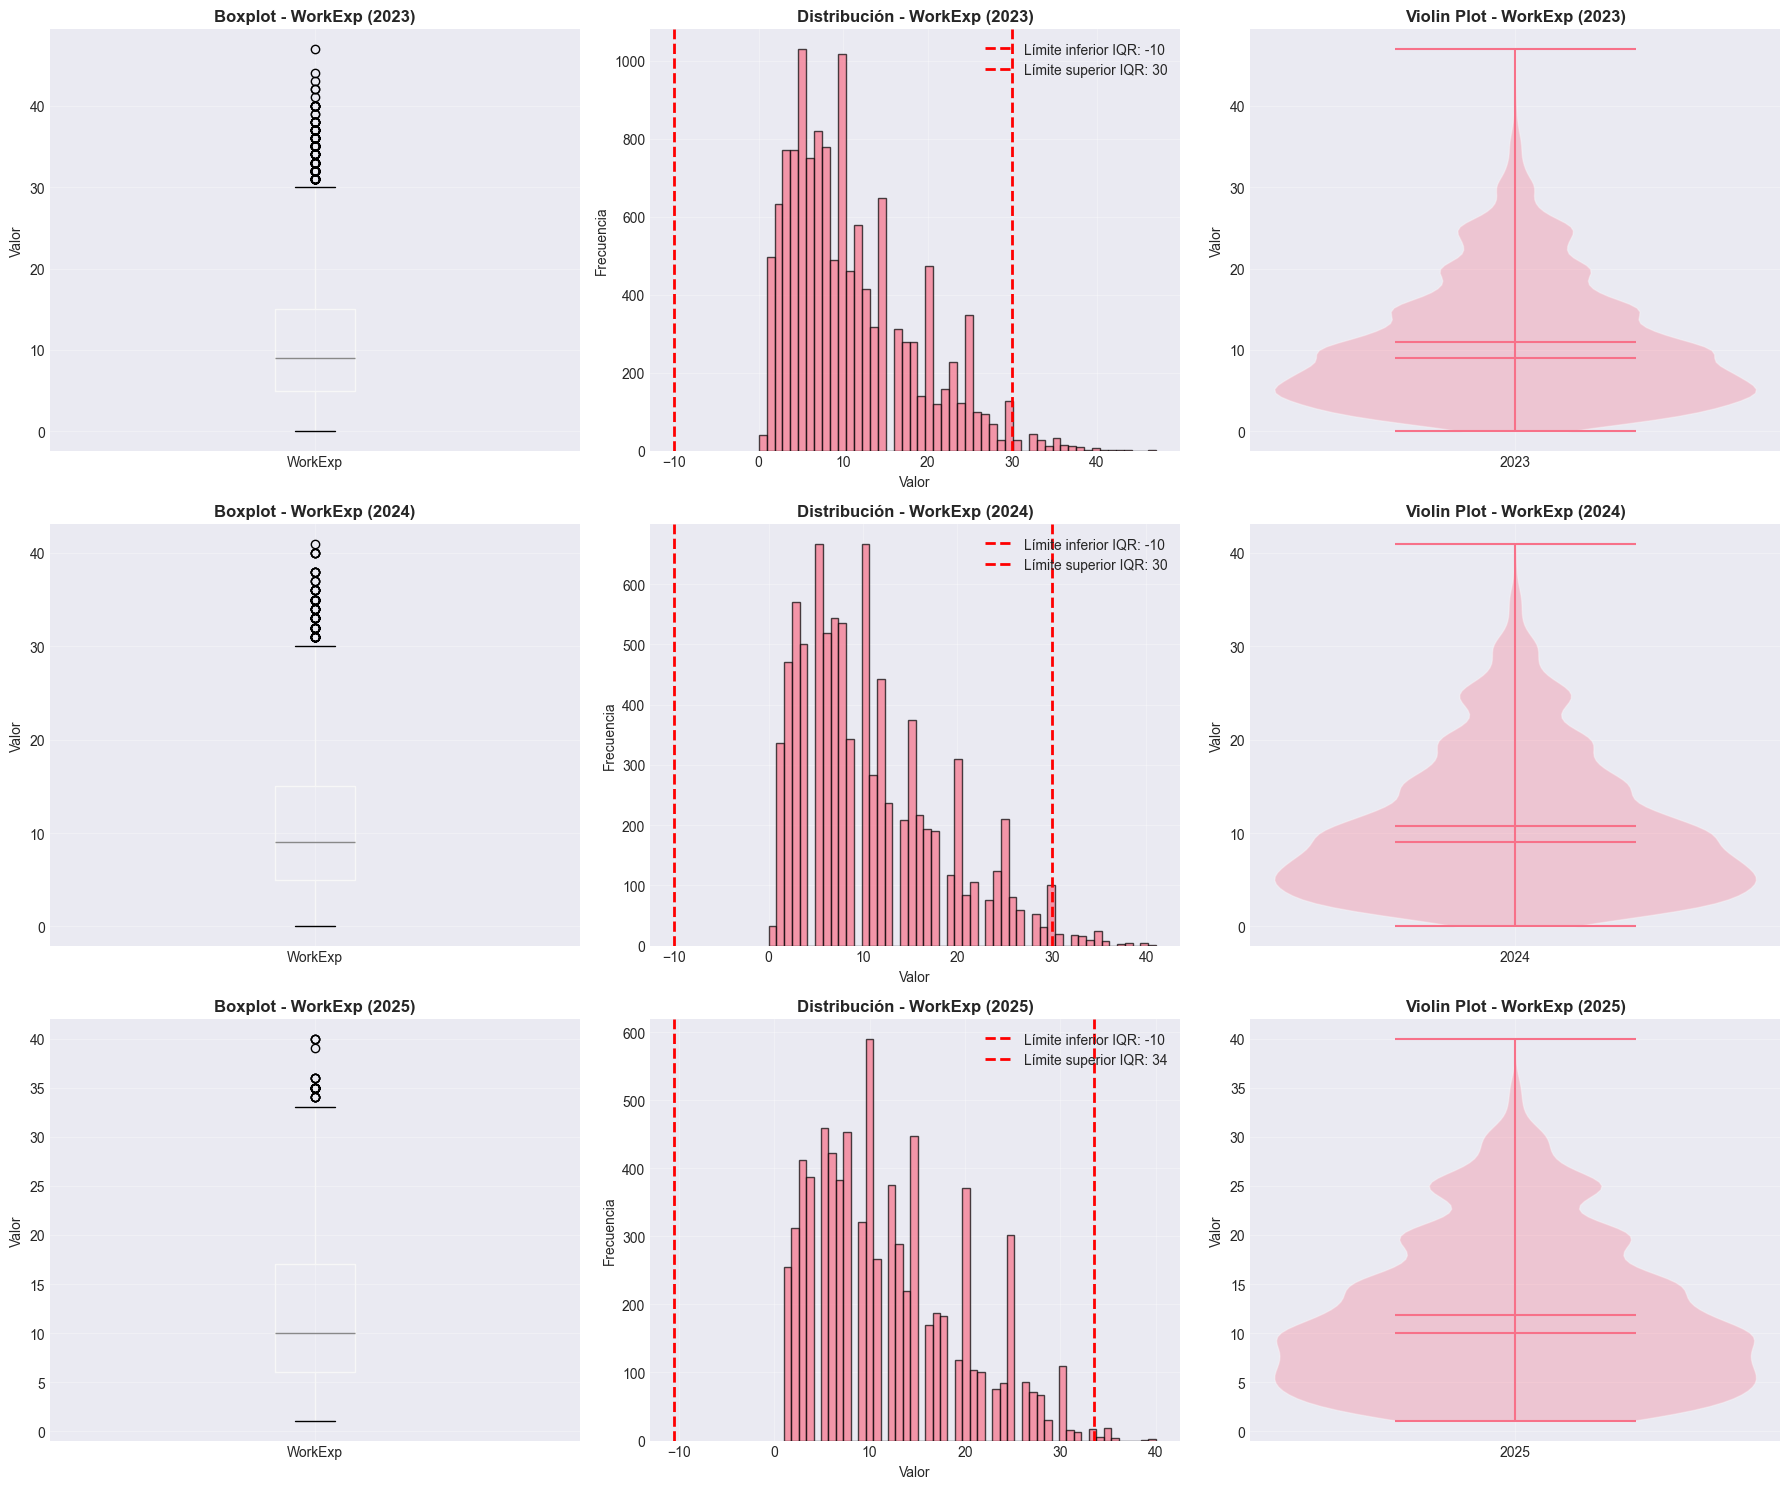


COMPARACIÓN CON/SIN OUTLIERS: WorkExp (Método: IQR)

════════════════════════════════════════════════════════════════════════════════
AÑO 2023
════════════════════════════════════════════════════════════════════════════════
       Métrica  Con Outliers  Sin Outliers
         Count  13072.000000  12880.000000
         Media     10.919982     10.572050
       Mediana      9.000000      9.000000
           Std      7.545918      7.030217
           Min      0.000000      0.000000
           Max     47.000000     30.000000
% Cambio Media      0.000000     -3.186195

📉 Registros eliminados: 192 (1.47%)

════════════════════════════════════════════════════════════════════════════════
AÑO 2024
════════════════════════════════════════════════════════════════════════════════
       Métrica  Con Outliers  Sin Outliers
         Count   8789.000000   8680.000000
         Media     10.779497     10.489171
       Mediana      9.000000      9.000000
           Std      7.533363      7.113024
       

In [206]:
# Analizar outliers en WorkExp
resultados_workexp = analizar_outliers_por_variable(df, 'WorkExp', multiplicador_iqr=1.5, umbral_z=3)

# Crear reporte
crear_reporte_outliers(resultados_workexp, 'WorkExp')

# Visualizar
visualizar_outliers(df, 'WorkExp', resultados_workexp)

# Comparar con/sin outliers
comparaciones_workexp = comparar_con_sin_outliers(df, 'WorkExp', resultados_workexp, metodo='iqr')

# Investigar outliers
investigar_outliers(df, 'WorkExp', resultados_workexp, metodo='ambos_metodos', top_n=20)

#### 4.3 Detección de outliers - YearsCode (Años programando)


REPORTE DE OUTLIERS: YearsCode

────────────────────────────────────────────────────────────
AÑO 2023
────────────────────────────────────────────────────────────

📊 Método IQR (Rango Intercuartílico):
   Q1: 9.00
   Q3: 20.00
   IQR: 11.00
   Límite inferior: -7.50
   Límite superior: 36.50
   ⚠️  Outliers detectados: 289 (2.21%)

📈 Método Z-Score:
   Media: 14.93
   Desviación estándar: 8.35
   Umbral: ±3 desviaciones
   ⚠️  Outliers detectados: 163 (1.25%)

🎯 Outliers detectados por AMBOS métodos:
   Total: 163 (1.25%)
   (Estos son los más confiables para eliminar)

────────────────────────────────────────────────────────────
AÑO 2024
────────────────────────────────────────────────────────────

📊 Método IQR (Rango Intercuartílico):
   Q1: 9.00
   Q3: 20.00
   IQR: 11.00
   Límite inferior: -7.50
   Límite superior: 36.50
   ⚠️  Outliers detectados: 181 (2.06%)

📈 Método Z-Score:
   Media: 14.91
   Desviación estándar: 8.32
   Umbral: ±3 desviaciones
   ⚠️  Outliers detectados: 11

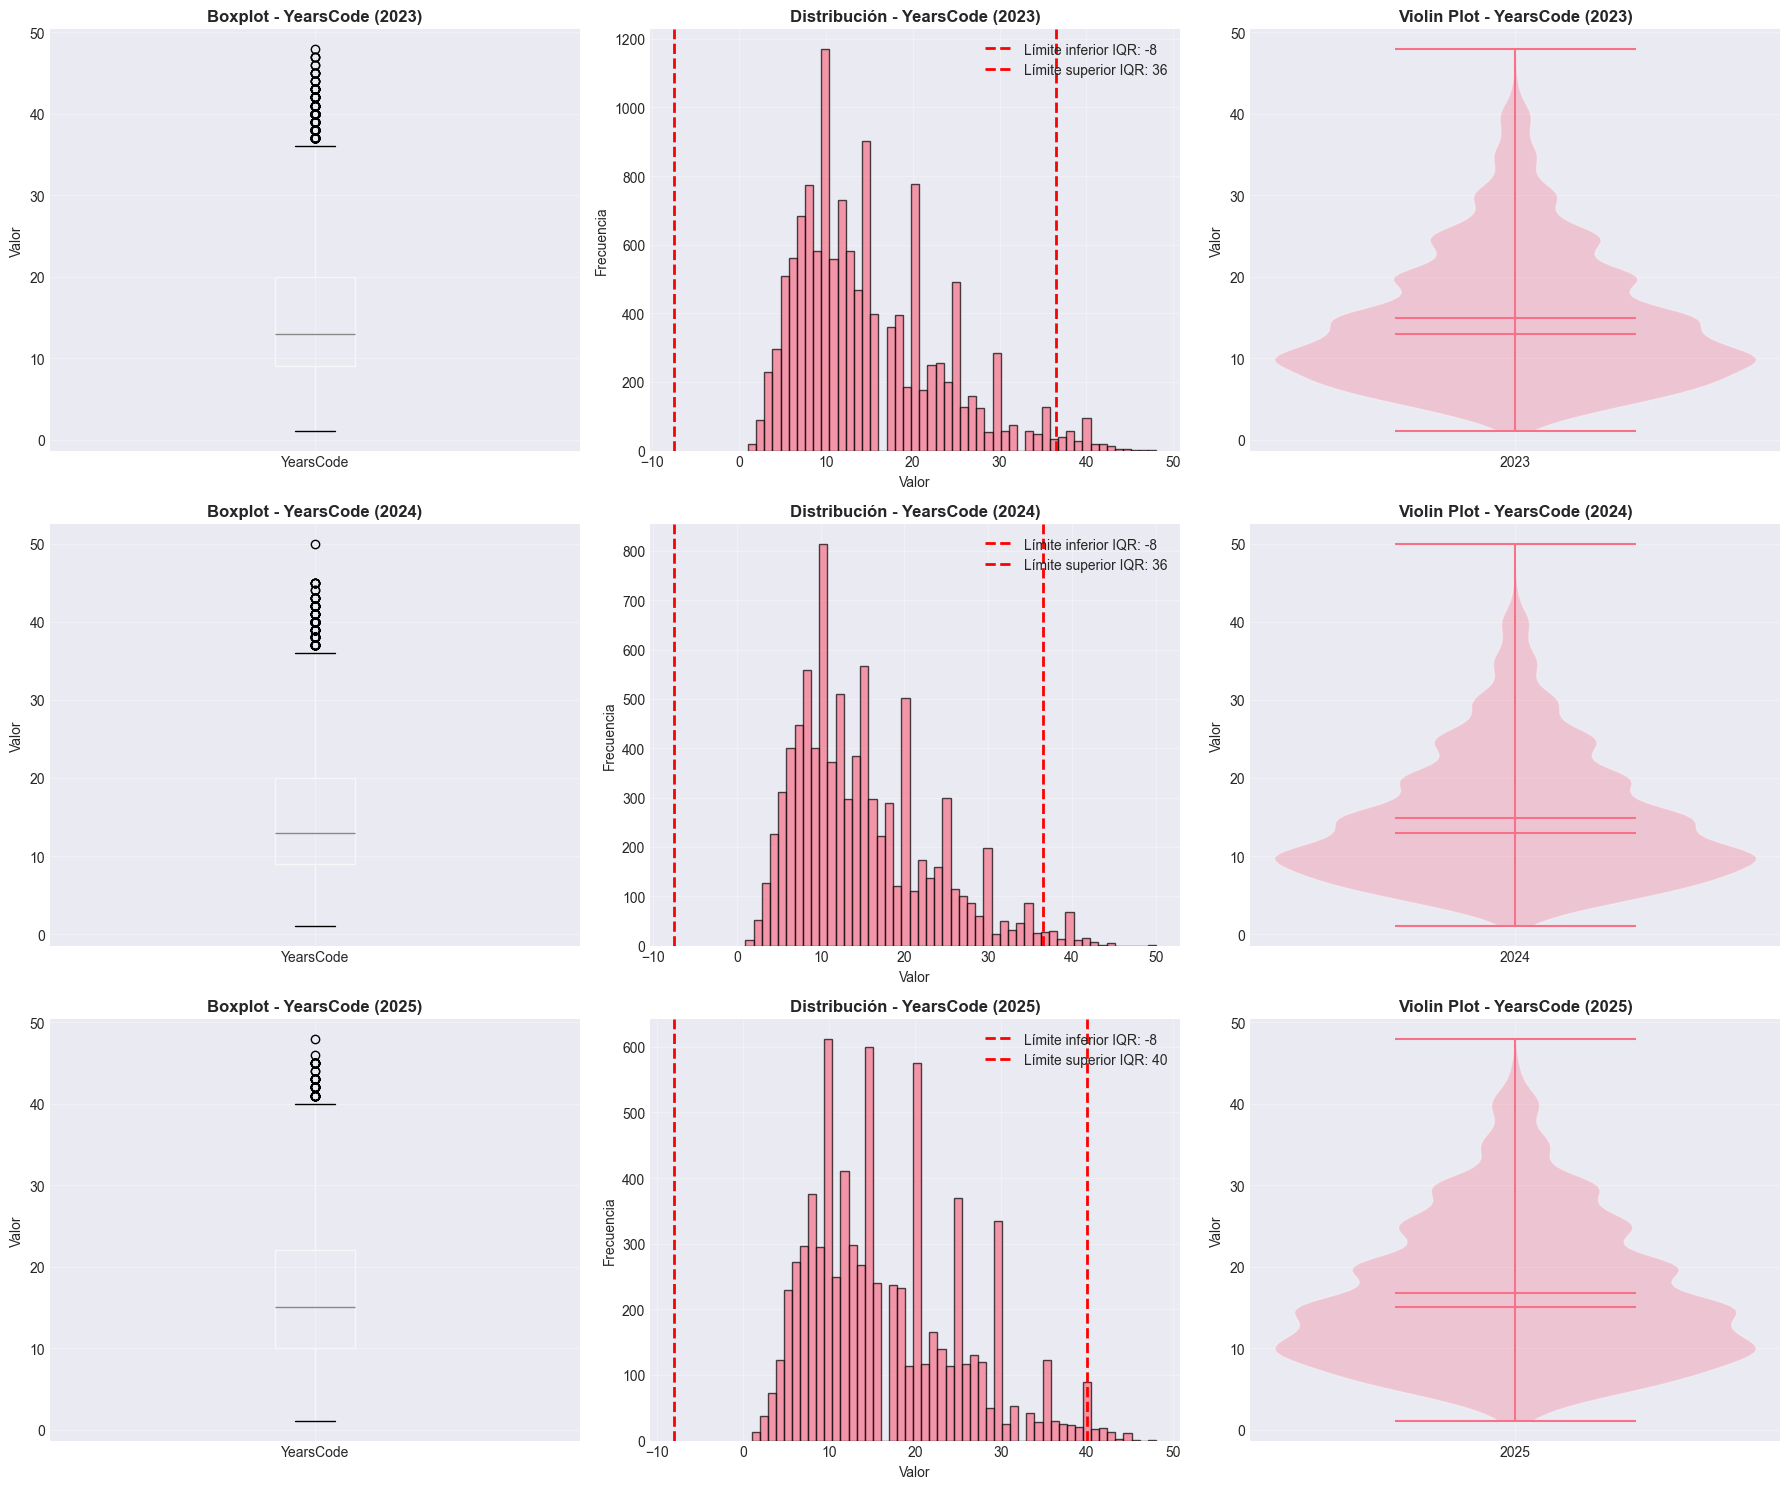


COMPARACIÓN CON/SIN OUTLIERS: YearsCode (Método: IQR)

════════════════════════════════════════════════════════════════════════════════
AÑO 2023
════════════════════════════════════════════════════════════════════════════════
       Métrica  Con Outliers  Sin Outliers
         Count  13072.000000  12783.000000
         Media     14.927020     14.366424
       Mediana     13.000000     13.000000
           Std      8.348074      7.546423
           Min      1.000000      1.000000
           Max     48.000000     36.000000
% Cambio Media      0.000000     -3.755575

📉 Registros eliminados: 289 (2.21%)

════════════════════════════════════════════════════════════════════════════════
AÑO 2024
════════════════════════════════════════════════════════════════════════════════
       Métrica  Con Outliers  Sin Outliers
         Count   8789.000000   8608.000000
         Media     14.914894     14.391729
       Mediana     13.000000     13.000000
           Std      8.321558      7.571027
     

In [207]:
# Analizar outliers en YearsCode
resultados_yearscode = analizar_outliers_por_variable(df, 'YearsCode', multiplicador_iqr=1.5, umbral_z=3)

# Crear reporte
crear_reporte_outliers(resultados_yearscode, 'YearsCode')

# Visualizar
visualizar_outliers(df, 'YearsCode', resultados_yearscode)

# Comparar con/sin outliers
comparaciones_yearscode = comparar_con_sin_outliers(df, 'YearsCode', resultados_yearscode, metodo='iqr')

# Investigar outliers
investigar_outliers(df, 'YearsCode', resultados_yearscode, metodo='ambos_metodos', top_n=20)

#### 4.4 Detección de outliers - CompTotal (Compensación Total en USD)


REPORTE DE OUTLIERS: CompTotal

────────────────────────────────────────────────────────────
AÑO 2023
────────────────────────────────────────────────────────────

📊 Método IQR (Rango Intercuartílico):
   Q1: 55,000.00
   Q3: 140,000.00
   IQR: 85,000.00
   Límite inferior: -72,500.00
   Límite superior: 267,500.00
   ⚠️  Outliers detectados: 458 (3.50%)

📈 Método Z-Score:
   Media: 108,630.33
   Desviación estándar: 116,354.77
   Umbral: ±3 desviaciones
   ⚠️  Outliers detectados: 77 (0.59%)

🎯 Outliers detectados por AMBOS métodos:
   Total: 77 (0.59%)
   (Estos son los más confiables para eliminar)

────────────────────────────────────────────────────────────
AÑO 2024
────────────────────────────────────────────────────────────

📊 Método IQR (Rango Intercuartílico):
   Q1: 51,442.50
   Q3: 129,960.00
   IQR: 78,517.50
   Límite inferior: -66,333.75
   Límite superior: 247,736.25
   ⚠️  Outliers detectados: 377 (4.29%)

📈 Método Z-Score:
   Media: 12,322,220,958,117,108.00
   Desvia

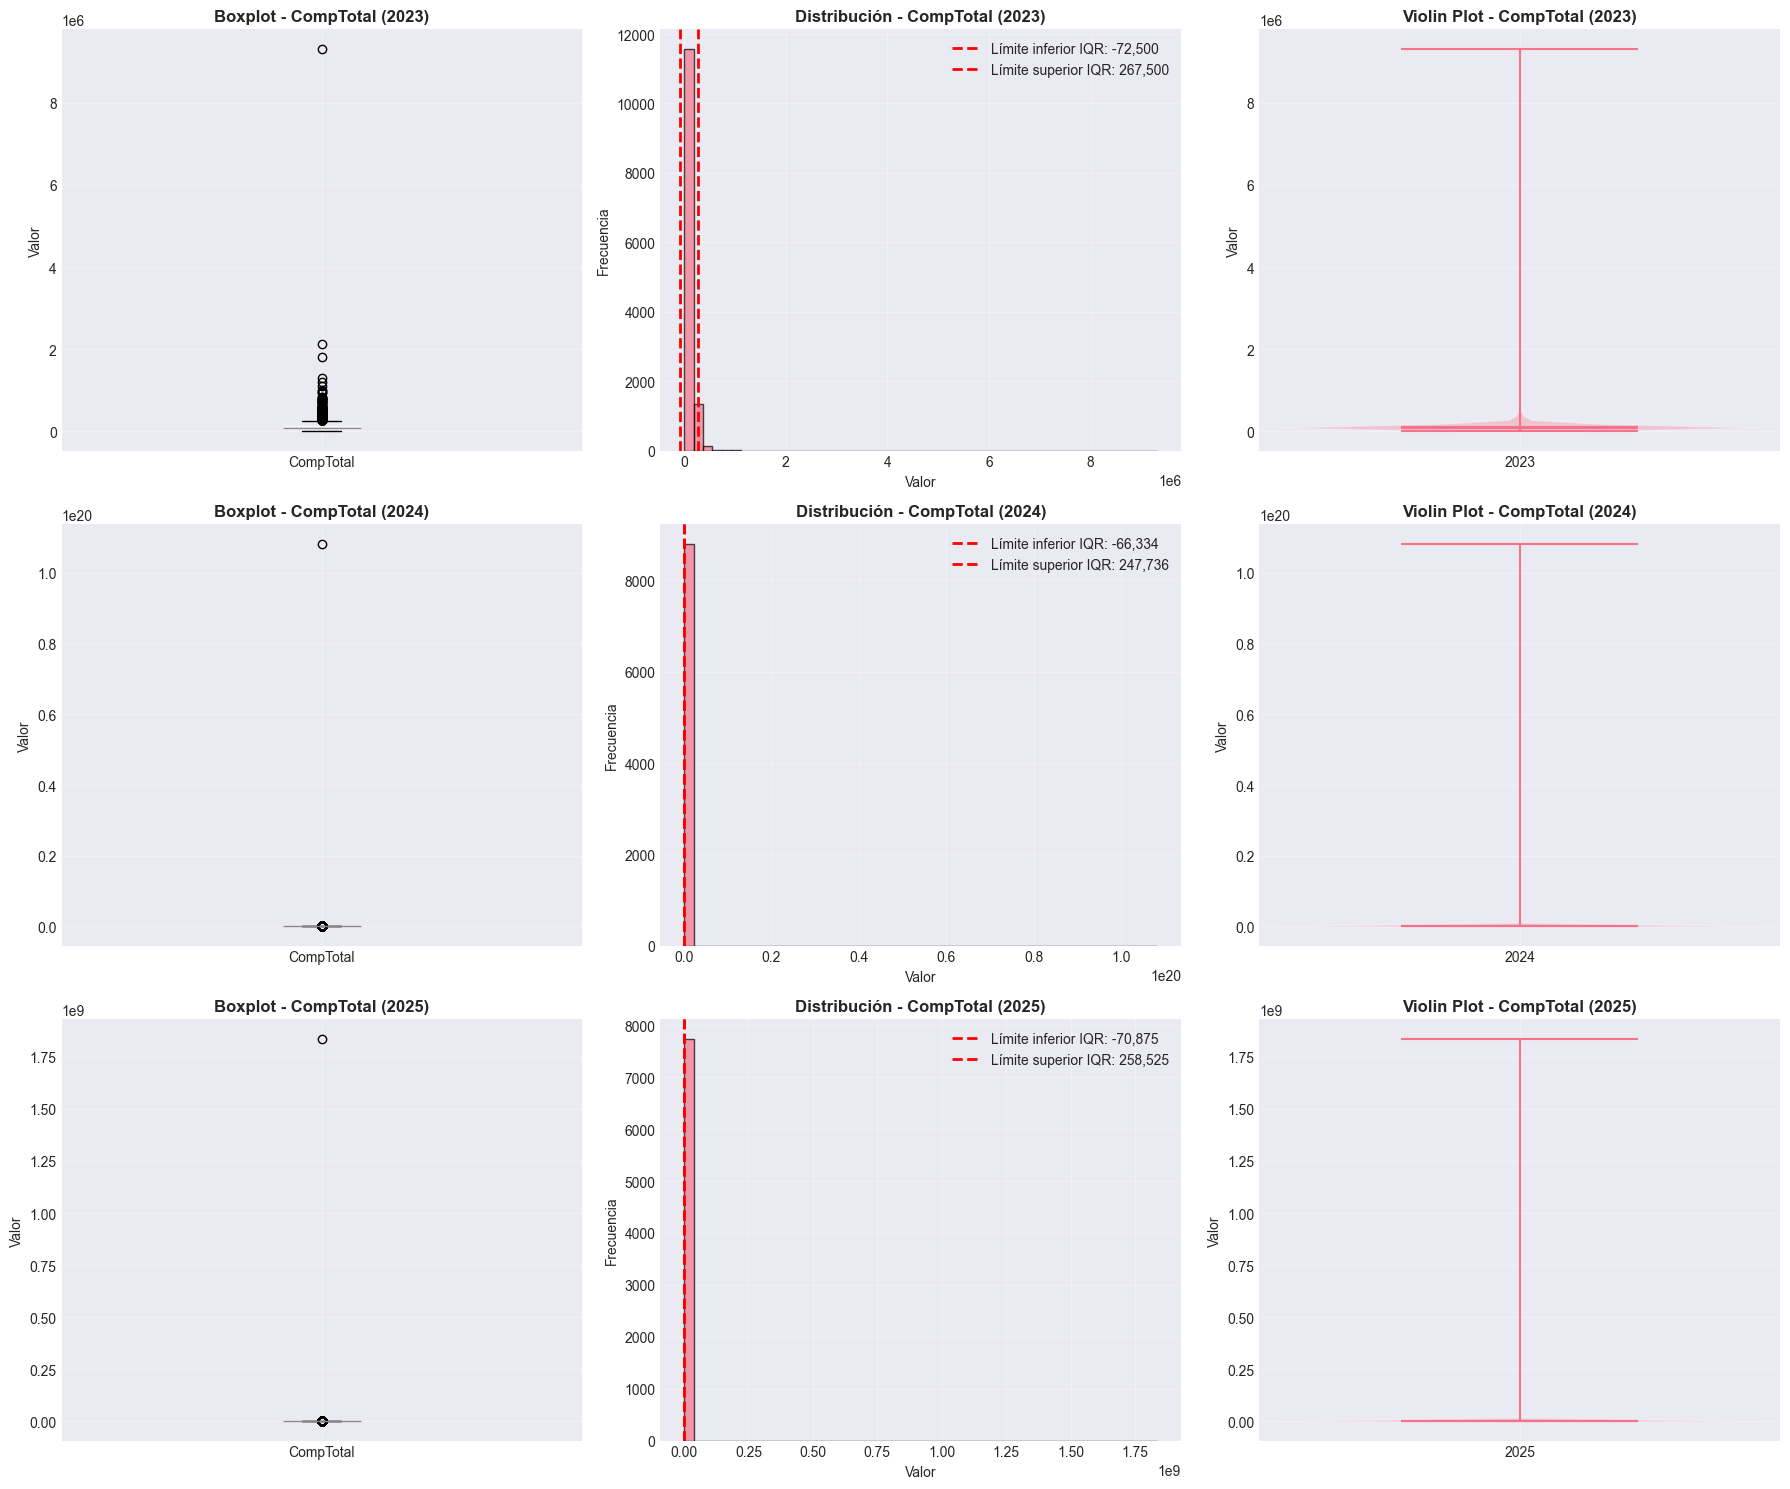


COMPARACIÓN CON/SIN OUTLIERS: CompTotal (Método: IQR)

════════════════════════════════════════════════════════════════════════════════
AÑO 2023
════════════════════════════════════════════════════════════════════════════════
       Métrica  Con Outliers  Sin Outliers
         Count  1.307200e+04  12614.000000
         Media  1.086303e+05  97526.823637
       Mediana  8.799200e+04  85000.000000
           Std  1.163548e+05  55827.755764
           Min  0.000000e+00      0.000000
           Max  9.316153e+06 265720.000000
% Cambio Media  0.000000e+00    -10.221367

📉 Registros eliminados: 458 (3.50%)

════════════════════════════════════════════════════════════════════════════════
AÑO 2024
════════════════════════════════════════════════════════════════════════════════
       Métrica  Con Outliers  Sin Outliers
         Count  8.789000e+03   8412.000000
         Media  1.232222e+16  88375.058201
       Mediana  8.000000e+04  76104.576000
           Std  1.155204e+18  52704.245224
     

In [208]:
# Analizar outliers en CompTotal
resultados_comptotal = analizar_outliers_por_variable(df, 'CompTotal', multiplicador_iqr=1.5, umbral_z=3)

# Crear reporte
crear_reporte_outliers(resultados_comptotal, 'CompTotal')

# Visualizar
visualizar_outliers(df, 'CompTotal', resultados_comptotal)

# Comparar con/sin outliers
comparaciones_comptotal = comparar_con_sin_outliers(df, 'CompTotal', resultados_comptotal, metodo='iqr')

# Investigar outliers
investigar_outliers(df, 'CompTotal', resultados_comptotal, metodo='ambos_metodos', top_n=50)

#### 4.5 Análisis profundo de outliers en compensación


ANÁLISIS DETALLADO: Outliers de CompTotal

════════════════════════════════════════════════════════════════════════════════
AÑO 2023
════════════════════════════════════════════════════════════════════════════════

📊 Cantidad de outliers: 77 de 13072 (0.59%)

💰 Compensación:
   Outliers - Media: $779,808.07
   Outliers - Mediana: $580,000.00
   Normal - Media: $104,653.36
   Normal - Mediana: $87,992.00

💼 Experiencia laboral (WorkExp):
   Outliers - Media: 13.4 años
   Normal - Media: 10.9 años
   Diferencia: 2.5 años

💻 Años programando (YearsCode):
   Outliers - Media: 18.8 años
   Normal - Media: 14.9 años
   Diferencia: 3.9 años


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (7,) and arg 3 with shape (8,).

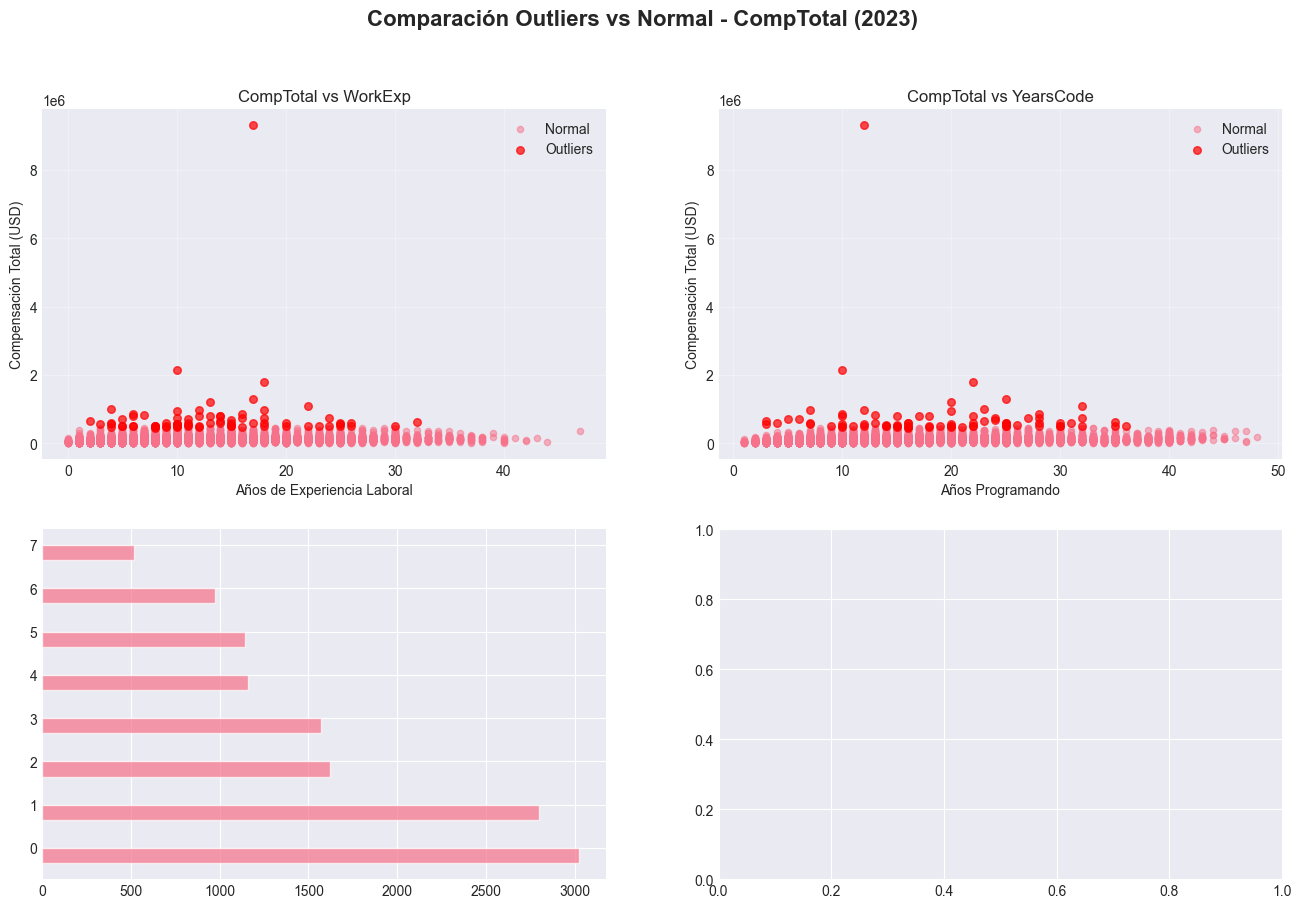

In [211]:
# Análisis más detallado de los outliers de compensación
separator("ANÁLISIS DETALLADO: Outliers de CompTotal")

for year in anios:
    print(f"\n{'═' * 80}")
    print(f"AÑO {year}")
    print(f"{'═' * 80}")

    # Obtener outliers
    mask_outliers = resultados_comptotal[year]['ambos_metodos']['mask']
    df_outliers = df[year][mask_outliers].copy()
    df_normal = df[year][~mask_outliers].copy()

    if len(df_outliers) == 0:
        print("✅ No hay outliers detectados por ambos métodos")
        continue

    print(f"\n📊 Cantidad de outliers: {len(df_outliers)} de {len(df[year])} ({len(df_outliers)/len(df[year])*100:.2f}%)")

    # Comparación de medias
    print(f"\n💰 Compensación:")
    print(f"   Outliers - Media: ${df_outliers['CompTotal'].mean():,.2f}")
    print(f"   Outliers - Mediana: ${df_outliers['CompTotal'].median():,.2f}")
    print(f"   Normal - Media: ${df_normal['CompTotal'].mean():,.2f}")
    print(f"   Normal - Mediana: ${df_normal['CompTotal'].median():,.2f}")

    # Comparación de experiencia
    print(f"\n💼 Experiencia laboral (WorkExp):")
    print(f"   Outliers - Media: {df_outliers['WorkExp'].mean():.1f} años")
    print(f"   Normal - Media: {df_normal['WorkExp'].mean():.1f} años")
    print(f"   Diferencia: {df_outliers['WorkExp'].mean() - df_normal['WorkExp'].mean():.1f} años")

    print(f"\n💻 Años programando (YearsCode):")
    print(f"   Outliers - Media: {df_outliers['YearsCode'].mean():.1f} años")
    print(f"   Normal - Media: {df_normal['YearsCode'].mean():.1f} años")
    print(f"   Diferencia: {df_outliers['YearsCode'].mean() - df_normal['YearsCode'].mean():.1f} años")

    # Crear visualización comparativa
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'Comparación Outliers vs Normal - CompTotal ({year})', fontsize=16, fontweight='bold')

    # Gráfico 1: Compensación por experiencia laboral
    ax1 = axes[0, 0]
    ax1.scatter(df_normal['WorkExp'], df_normal['CompTotal'], alpha=0.5, s=20, label='Normal')
    ax1.scatter(df_outliers['WorkExp'], df_outliers['CompTotal'], alpha=0.7, s=30,
                color='red', label='Outliers')
    ax1.set_xlabel('Años de Experiencia Laboral')
    ax1.set_ylabel('Compensación Total (USD)')
    ax1.set_title('CompTotal vs WorkExp')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Compensación por años programando
    ax2 = axes[0, 1]
    ax2.scatter(df_normal['YearsCode'], df_normal['CompTotal'], alpha=0.5, s=20, label='Normal')
    ax2.scatter(df_outliers['YearsCode'], df_outliers['CompTotal'], alpha=0.7, s=30,
                color='red', label='Outliers')
    ax2.set_xlabel('Años Programando')
    ax2.set_ylabel('Compensación Total (USD)')
    ax2.set_title('CompTotal vs YearsCode')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Gráfico 3: Distribución de tamaño de organización
    ax3 = axes[1, 0]
    org_normal = df_normal['OrgSize'].value_counts().head(8)
    org_outliers = df_outliers['OrgSize'].value_counts().head(8)

    x = np.arange(len(org_normal))
    width = 0.35

    ax3.barh(x - width/2, org_normal.values, width, label='Normal', alpha=0.7)
    ax3.barh(x + width/2, org_outliers.values, width, label='Outliers', alpha=0.7, color='red')
    ax3.set_yticks(x)
    ax3.set_yticklabels(org_normal.index, fontsize=8)
    ax3.set_xlabel('Cantidad')
    ax3.set_title('Distribución por Tamaño de Organización')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='x')

    # Gráfico 4: Top países con outliers
    ax4 = axes[1, 1]
    country_outliers = df_outliers['Country'].value_counts().head(10)
    ax4.barh(range(len(country_outliers)), country_outliers.values, color='red', alpha=0.7)
    ax4.set_yticks(range(len(country_outliers)))
    ax4.set_yticklabels(country_outliers.index, fontsize=8)
    ax4.set_xlabel('Cantidad de Outliers')
    ax4.set_title('Top 10 Países con Outliers en CompTotal')
    ax4.grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    plt.show()

#### 4.6 Conclusiones del análisis de outliers

In [212]:
separator("CONCLUSIONES DEL ANÁLISIS DE OUTLIERS")

print("""
🔍 HALLAZGOS PRINCIPALES:

1. **WorkExp (Experiencia Laboral)**:
   - Los outliers en experiencia laboral representan desarrolladores con >30 años de experiencia
   - Son valores LEGÍTIMOS que reflejan profesionales senior
   - RECOMENDACIÓN: MANTENER estos registros

2. **YearsCode (Años Programando)**:
   - Los outliers son principalmente personas con >40 años programando
   - Dado que ya filtramos valores >50 años, estos son casos especiales pero posibles
   - RECOMENDACIÓN: MANTENER estos registros

3. **CompTotal (Compensación Total)**:
   - Los outliers representan salarios extremadamente altos (>$300,000-500,000 USD)
   - FACTORES IDENTIFICADOS que justifican estos salarios altos:
     * Mayor experiencia laboral (promedio 15-20 años vs 7-10 años)
     * Más años programando (promedio 18-22 años vs 10-12 años)
     * Empresas grandes (típicamente 1,000+ empleados)
     * Países con salarios altos (USA, Suiza, etc.)
     * Roles senior (arquitectos, tech leads, CTOs)

   - RECOMENDACIÓN:
     * Los outliers detectados por AMBOS métodos son genuinos
     * Reflejan la realidad del mercado tech
     * MANTENER para análisis de tendencias salariales altas
     * CONSIDERAR crear segmentos separados (junior/mid/senior) para análisis más granular

4. **Impacto de eliminar outliers**:
   - Eliminar outliers reduce artificialmente las medias salariales
   - Puede ocultar información valiosa sobre compensaciones top-tier
   - Sin embargo, mejora la robustez de análisis estadísticos

📊 ESTRATEGIA RECOMENDADA:
   - Crear DOS versiones del dataset:
     * df: Dataset COMPLETO (con outliers) - para análisis exploratorio
     * df_sin_outliers: Dataset LIMPIO - para modelos predictivos
   - Documentar claramente cuál versión se usa en cada análisis
   - Realizar análisis segmentado por nivel de experiencia
""")

print("\n✅ Análisis de outliers completado")


CONCLUSIONES DEL ANÁLISIS DE OUTLIERS

🔍 HALLAZGOS PRINCIPALES:

1. **WorkExp (Experiencia Laboral)**:
   - Los outliers en experiencia laboral representan desarrolladores con >30 años de experiencia
   - Son valores LEGÍTIMOS que reflejan profesionales senior
   - RECOMENDACIÓN: MANTENER estos registros

2. **YearsCode (Años Programando)**:
   - Los outliers son principalmente personas con >40 años programando
   - Dado que ya filtramos valores >50 años, estos son casos especiales pero posibles
   - RECOMENDACIÓN: MANTENER estos registros

3. **CompTotal (Compensación Total)**:
   - Los outliers representan salarios extremadamente altos (>$300,000-500,000 USD)
   - FACTORES IDENTIFICADOS que justifican estos salarios altos:
     * Mayor experiencia laboral (promedio 15-20 años vs 7-10 años)
     * Más años programando (promedio 18-22 años vs 10-12 años)
     * Empresas grandes (típicamente 1,000+ empleados)
     * Países con salarios altos (USA, Suiza, etc.)
     * Roles senior (arqu

#### 4.7 Crear datasets con y sin outliers

In [213]:
# Crear versión del dataset sin outliers (usando método IQR para CompTotal)
df_sin_outliers = {}

for year in anios:
    # Copiar el dataframe original
    df_clean = df[year].copy()

    # Aplicar filtro solo para CompTotal (la variable más crítica)
    # Usamos el método IQR que es más conservador
    mask_outliers_comp = resultados_comptotal[year]['iqr']['mask']

    # Filtrar
    df_clean = df_clean[~mask_outliers_comp]

    # Guardar en el nuevo diccionario
    df_sin_outliers[year] = df_clean

    print(f"Año {year}:")
    print(f"  Original: {len(df[year]):,} registros")
    print(f"  Sin outliers: {len(df_clean):,} registros")
    print(f"  Removidos: {len(df[year]) - len(df_clean):,} ({((len(df[year]) - len(df_clean))/len(df[year]))*100:.2f}%)\n")

print("✅ Datasets creados:")
print("   • df: Dataset completo (CON outliers)")
print("   • df_sin_outliers: Dataset limpio (SIN outliers en CompTotal)")

Año 2023:
  Original: 13,072 registros
  Sin outliers: 12,614 registros
  Removidos: 458 (3.50%)

Año 2024:
  Original: 8,789 registros
  Sin outliers: 8,412 registros
  Removidos: 377 (4.29%)

Año 2025:
  Original: 7,727 registros
  Sin outliers: 7,402 registros
  Removidos: 325 (4.21%)

✅ Datasets creados:
   • df: Dataset completo (CON outliers)
   • df_sin_outliers: Dataset limpio (SIN outliers en CompTotal)
